In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv")
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 5)

In [4]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [8]:
X = data.drop(['class'], axis=1)
y = data.drop(['sepal length',  'sepal width',  'petal length',  'petal width'], axis=1)
print(X)
print(y)
print(X.shape)
print(y.shape)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
              class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]
(150, 4)
(150, 1

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [11]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9333333333333333

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print(accuracy_score(y_test, y_pred))

0.9333333333333333


Confusion matrix:
[[13  0  0]
 [ 0  4  0]
 [ 0  2 11]]


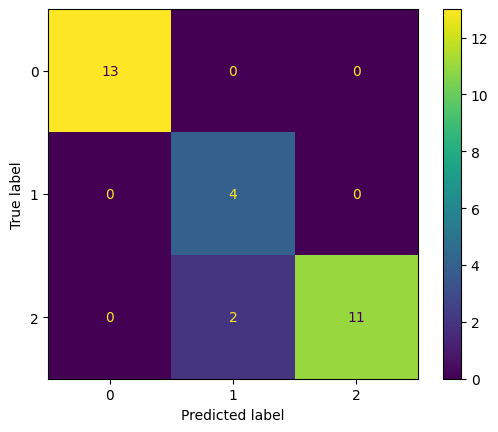

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
print("Confusion matrix:")
print(cm)
disp.plot()
plt.show()

In [15]:
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

TP, FP, FN, TN = get_confusion_matrix_values(y_test, y_pred)
print("TP: ", TP)
print("FP: ", FP)
print("FN: ", FN)
print("TN: ", TN)

TP:  13
FP:  0
FN:  0
TN:  4


In [16]:
print("Accuracy: ", (TP+TN)/(TP+TN+FP+FN))
print("precision: ", TP/(TP+FP))
print("recall: ", TP/(TP+FN))

Accuracy:  1.0
precision:  1.0
recall:  1.0
